# Posterior inference for GGP graph model 

In this notebook, we'll infer the posterior distribution of yeast dataset using generalised gamma process graph model.

Original source of the dataset with detailed description: http://www.cise.ufl.edu/research/sparse/matrices/Pajek/yeast.html

In [1]:
import os
import pickle
import time
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from sgp import GGPgraphmcmc

%matplotlib inline

### Loading yeast dataset

In [2]:
mat = loadmat('../data/yeast/yeast.mat')
graph = mat['Problem'][0][0][2]

### Run MCMC sampler

In [3]:
modelparam = dict()
mcmcparam = dict()

modelparam['alpha'] = (0, 0)
modelparam['sigma'] = (0, 0)
modelparam['tau'] = (0, 0)

mcmcparam['niter'] = 500
mcmcparam['nburn'] = 1
mcmcparam['thin'] = 1
mcmcparam['leapfrog.L'] = 5
mcmcparam['leapfrog.epsilon'] = 0.1
mcmcparam['leapfrog.nadapt'] = 1
mcmcparam['latent.MH_nb'] = 1
mcmcparam['hyper.MH_nb'] = 2
mcmcparam['hyper.rw_std'] = [0.02, 0.02]
mcmcparam['store_w'] = True

typegraph='undirected' # or simple

samples, stats = GGPgraphmcmc(graph, modelparam, mcmcparam, typegraph, verbose=True)

Iteration=0
	alpha = 46.50
	sigma = -0.523
	tau   = 4.247
-----------------------------------
Start MCMC for GGP graphs
Nb of nodes: 2361 - Nb of edges: 14364
Number of iterations: 500
Estimated computation time: 0 hour(s) 25 minute(s)
Estimated end of computation:  Jul 20th, 15:40:37
-----------------------------------
-----------------------------------
End MCMC for GGP graphs
Computation time: 0 hour(s) 22 minute(s)
End of computation:  Jul 20th, 15:37:08
-----------------------------------


/Users/arongdari/anaconda/lib/python3.5/site-packages/numpy-1.11.1-py3.5-macosx-10.5-x86_64.egg/numpy/core/_methods.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_minimum(a, axis, None, out, keepdims)
/Users/arongdari/anaconda/lib/python3.5/site-packages/numpy-1.11.1-py3.5-macosx-10.5-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/arongdari/anaconda/lib/python3.5/site-packages/numpy-1.11.1-py3.5-macosx-10.5-x86_64.egg/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/arongdari/workspace/sparse-graph-prior/sgp/GGPgraphmcmc.py:54: RuntimeWarning: invalid value encountered in add
  logaccept_d = diff_d * lograte_poi - gammaln(dprop + 1.) + gammaln(d + 1.) - logqprop + logq


The invalid values are carefully handled in the inference codes. It is safe to ignore the warning messages.

## Trace plots of some variables of interest

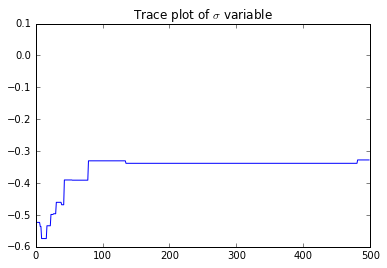

In [4]:
plt.plot(samples['sigma'])
plt.title('Trace plot of $\sigma$ variable')

When the sigma is less than 0, the inferred graph is dense.

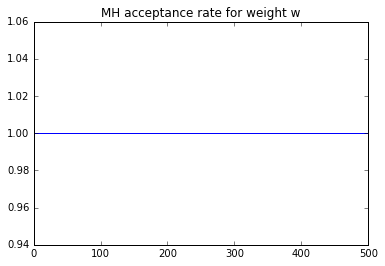

In [5]:
plt.plot(stats['w_rate'])
plt.title('MH acceptance rate for weight w')

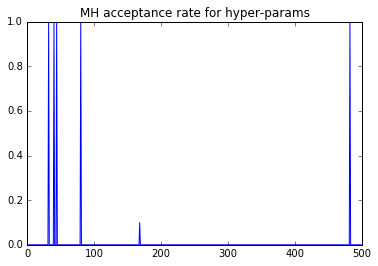

In [6]:
plt.plot(stats['hyper_rate'])
plt.title('MH acceptance rate for hyper-params')

checking the acceptance ratio